
<div style="color:#D81F26;
           display:fill;
           border-style: solid;
           border-color:#C1C1C1;
           font-size:14px;
           font-family:Calibri;
           background-color:#373737;">
<h2 style="text-align: center;
           padding: 10px;
           color:#FFFFFF;">
======= Easy-to-use AutoML (Autogluon, FLAML, AutoSKLearn) =======
</h2>
</div>

<img src="https://research.aimultiple.com/wp-content/webp-express/webp-images/uploads/2018/06/good-data-800x400.jpg.webp" length=700 width=700>

In [1]:
# Need to intall the latest sklearn in order to use the auto-sklearn
!apt-get remove swig
!apt-get install swig3.0 build-essential -y
!ln -s /usr/bin/swig3.0 /usr/bin/swig
!apt-get install build-essential
!pip install --upgrade setuptools
!pip install auto-sklearn
!pip install -U scikit-learn
!pip freeze | grep scikit-learn

# Install  the FLAML package
!pip install flaml
!pip install autogluon

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'swig' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
Suggested packages:
  swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig3.0
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,109 kB of archives.
After this operation, 5,555 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig3.0 amd64 3.0.12-2.2ubuntu1 [1,109 kB]
Fetched 1,109 kB in 0s (3,624 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-2.2ubuntu1_amd64.deb ...
Unpacking swig3.0 (3.0.12-2.2ubun

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 98.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 82.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.7 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=913b6b45ecff45d1c3a1310acc3f8c

# **You need to restart runtime after this step. The installation part will take around 15 mins**

# 1. About this notebook

AutoML is a valuable tool for data scientists, as it streamlines the process of selecting the optimal machine learning model and hyperparameters while minimizing the need for technical expertise. With AutoML, data scientists can focus on use case application, integration, and model deployment. This notebook utilizes three AutoML packages to compare their performance using the Heart Failure Prediction dataset. AutoML alleviates the overhead of model algorithm comparison and hyperparameter tuning for each algorithm, automatically selecting the best model algorithm for inference.

## 1.1. Summary of the Piepline

* Check if there are any null values in the features
* Handle the outliers for numerical variables by IRQ
* Standardize the distribution of numerical variables by RobustScaler
* Encode categorical variables by OneHotEncoder
* Perform the Autogluon, FLAML and AutoSKLearn automl model and measure performance metrics of Accuracy, Precision, F1, Recall, ROC AUC and Confusion Matrix

## 1.2. Observation and Findings

The results indicate that <b>Autogluon</b> outperforms the other two packages, while <b>AutoSKLearn</b> performs the worst. One of the reasons for this difference in performance could be the availability of model algorithms. <b>AutoSKLearn</b> only uses models available in SKLearn and forms ensembles from base learners such as regression, decision tree, and kNN. In contrast, <b>FLAML</b> and <b>Autogluon</b> AutoML include advanced model algorithms like XGBoost, LGBM, and CatBoost. Despite the advanced model algorithms, <b>Autogluon</b> AutoML also uses an ensemble classifier based on the base advanced model learners of XGBoost and LGBM. This drives <b>Autogluon</b> to slightly outperform <b>FLAML</b>, as <b>FLAML</b> has no ensemble classifier from the base learners.


# 2. Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## 2.1. Package Installation

In [2]:
# Data Standardization and Encoding
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Compariosn for Model Performance
from sklearn import model_selection, metrics, naive_bayes

# Visualization Library, matplotlib and seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 2.2. Data Set

#### The Heart Failure Prediction Dataset, which is contributed by @fedesoriano, is used.  The details of the data set can be referred to [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## 2.3. Data Attributes


* <div style="font-size: 18px">Age: age of the patient [years]</div>
* <div style="font-size: 18px">Sex: sex of the patient [M: Male, F: Female]</div>
* <div style="font-size: 18px">ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</div>
* <div style="font-size: 18px">RestingBP: resting blood pressure [mm Hg]</div>
* <div style="font-size: 18px">Cholesterol: serum cholesterol [mm/dl]</div>
* <div style="font-size: 18px">FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</div>
* <div style="font-size: 18px">RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</div>
* <div style="font-size: 18px">MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</div>
* <div style="font-size: 18px">ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</div>
* <div style="font-size: 18px">Oldpeak: oldpeak = ST [Numeric value measured in depression]</div>
* <div style="font-size: 18px">ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</div>
* <div style="font-size: 18px">HeartDisease: target class [1: heart disease, 0: Normal]</div>


## 2.4. Load the data

In [3]:
df_heart = pd.read_csv('https://raw.githubusercontent.com/nyp-sit/sdaai-iti103/master/session%209/heart.csv')
print('No. of row: {}, no. of columns: {}'.format(df_heart.shape[0], df_heart.shape[1]))

No. of row: 918, no. of columns: 12


# 3. Exploratory Data Analysis

## 3.1. Distribution of target feature

<div style=" background-color:#3a5311;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Objective: to check if the distribution of target feature (i.e. heart disease) is balanced.  If it is not the case, we will do oversampling.  
</div>

Text(0.5, 1.0, 'Distribution of Target Label (i.e. Heard Disease)')

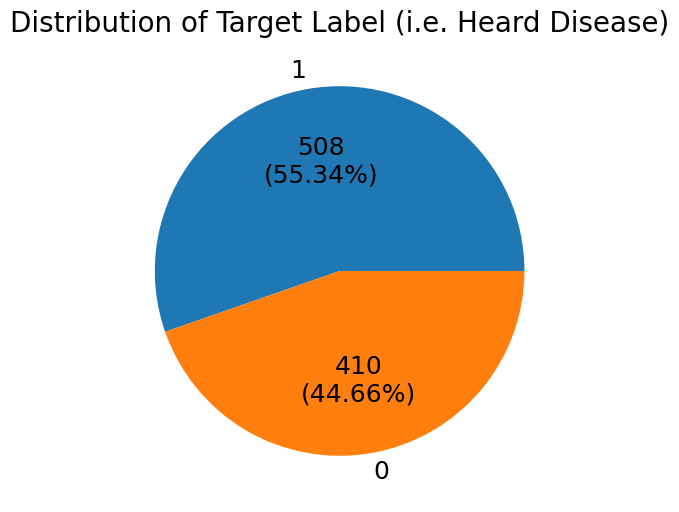

In [4]:
# check whether the data set is balanced

def auto_fmt (pct_value):
    return '{:.0f}\n({:.2f}%)'.format(df_heart['HeartDisease'].value_counts().sum()*pct_value/100,pct_value)

df_target_count = df_heart['HeartDisease'].value_counts().rename_axis('HeartDisease').reset_index(name='Counts')

# plt.pie(x=df_target_count, labels=df_target_count.index, autopct='%1.2f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(x=df_target_count['Counts'], labels=df_target_count['HeartDisease'], autopct=auto_fmt, textprops={'fontsize': 18})
plt.title('Distribution of Target Label (i.e. Heard Disease)',  fontsize = 20)
# plt.axis('equal')

<div style=" background-color:#0A1172;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Observation: the distribution of target feature between disgnosed and non-disgnosed cases is quite even.  It is no necessary to do oversampling, e.g. SMOTE.
</div>


## 3.2 Missing value replacement
<div style=" background-color:#3a5311;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Objective: to check if the data has missing value.  If it is the case, we will do pre-processing for missing value replacement, e.g. replace null with mode for categorical variables and with mean / median for numerical variables
</div>

In [5]:
df_heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<div style=" background-color:#0A1172;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Observation: there is no missing value in the data.
</div>

## 3.3 Outlier analysis and detection

<div style=" background-color:#3a5311;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Objective: Outlier analysis is the process of identifying abnormal or extreme observations in a data set. Since outlier causes distribution to have skew distribution, and decision boundary of a model may be skewed to long-tail side, causing inappropriate decision from models.
</div>


In [6]:
# identify the type of features into either numerical or categorical by values of the features

categorical = [var for var in df_heart.columns if df_heart[var].dtype=='O']
numerical = [var for var in df_heart.columns if df_heart[var].dtype != 'O' and (var != 'HeartDisease')]

# FastingBS will be automatically identified as numerical feature since it only has value of 0 and 1.  We will manually re-group it into categorical feature

categorical.append('FastingBS')
numerical.remove('FastingBS')

print ('Size of the base {}'.format(df_heart.shape))
print ('Total No. of variables {}'.format (len(categorical) + len(numerical)))
print ('Total No. of categorical variables {}'.format (len(categorical)))
print ('Total No. of numberical variables {}'.format (len(numerical)))

Size of the base (918, 12)
Total No. of variables 11
Total No. of categorical variables 6
Total No. of numberical variables 5


<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Using Boxplot and Histogram to analyze distribution of numerical variables.  This aims to analyze outliers.  </div>

In [7]:
df_heart[numerical].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The Boxplot to analyze outliers</div>

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

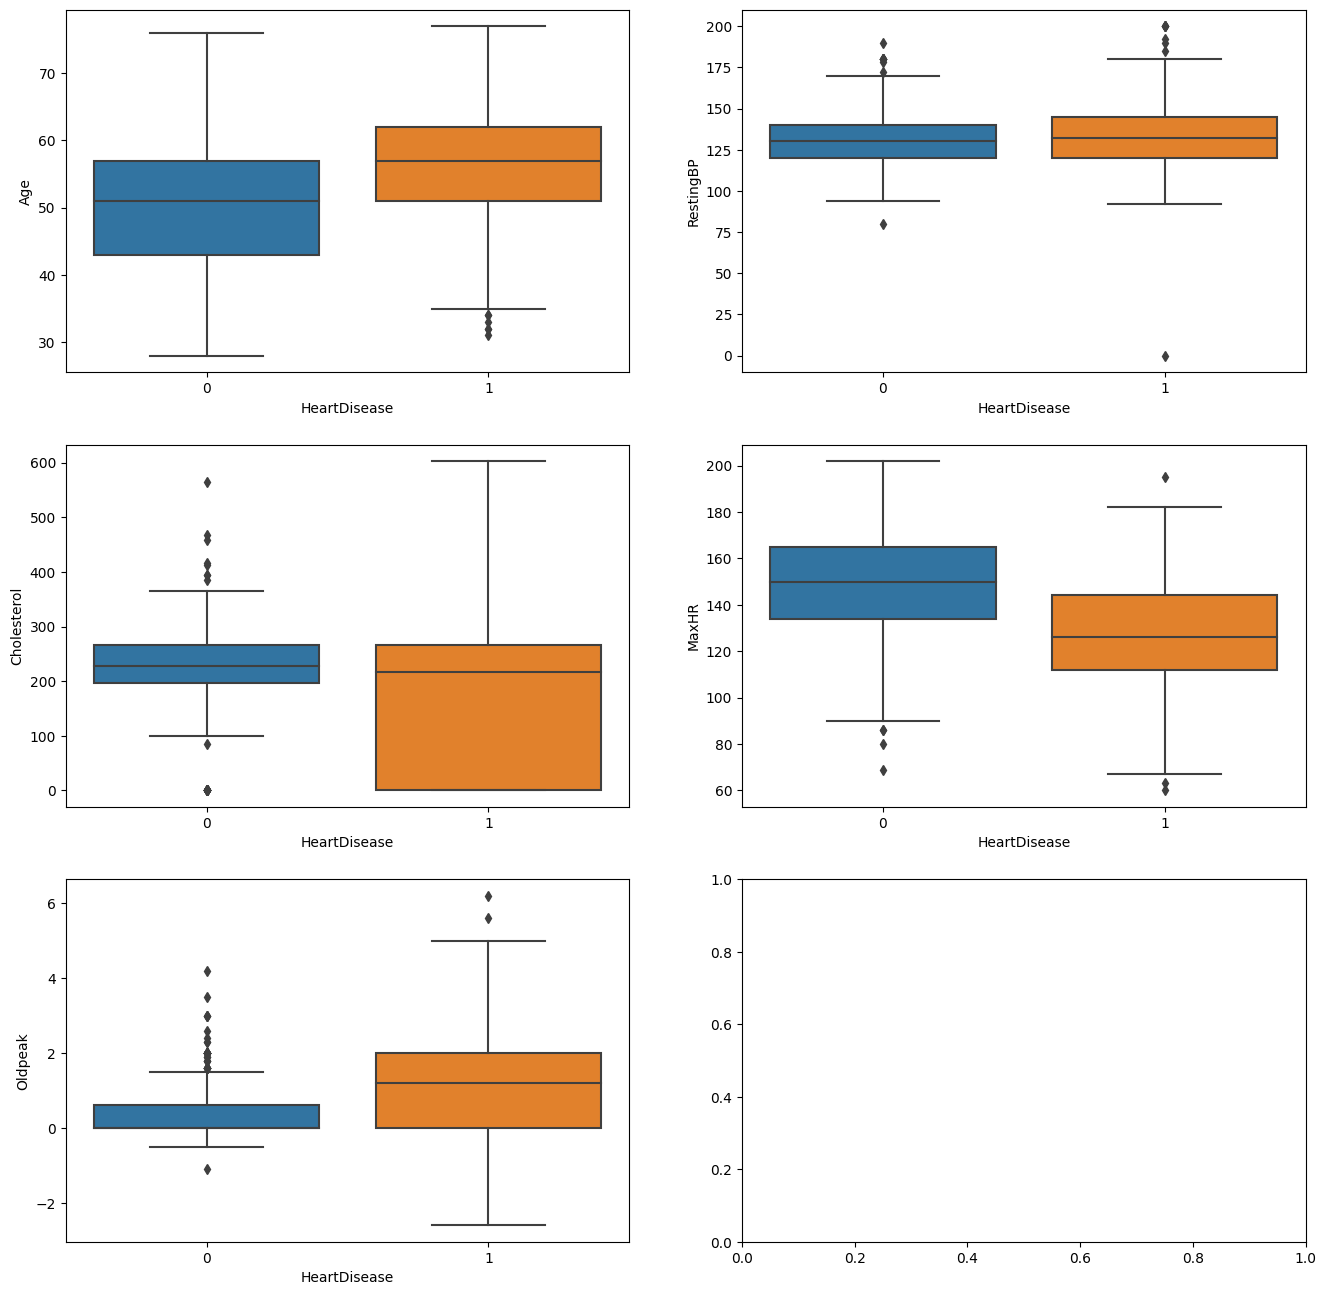

In [8]:
# Histgram for numercial features
fig, ax = plt.subplots(3, 2, figsize=(16,16))

sns.boxplot(x="HeartDisease",y="Age",data=df_heart, ax=ax[0][0])
sns.boxplot(x="HeartDisease",y="RestingBP",data=df_heart, ax=ax[0][1])
sns.boxplot(x="HeartDisease",y="Cholesterol",data=df_heart, ax=ax[1][0])
sns.boxplot(x="HeartDisease",y="MaxHR",data=df_heart, ax=ax[1][1])
sns.boxplot(x="HeartDisease",y="Oldpeak",data=df_heart, ax=ax[2][0])

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To use Histogram to analyze skewness of the distribution</div>

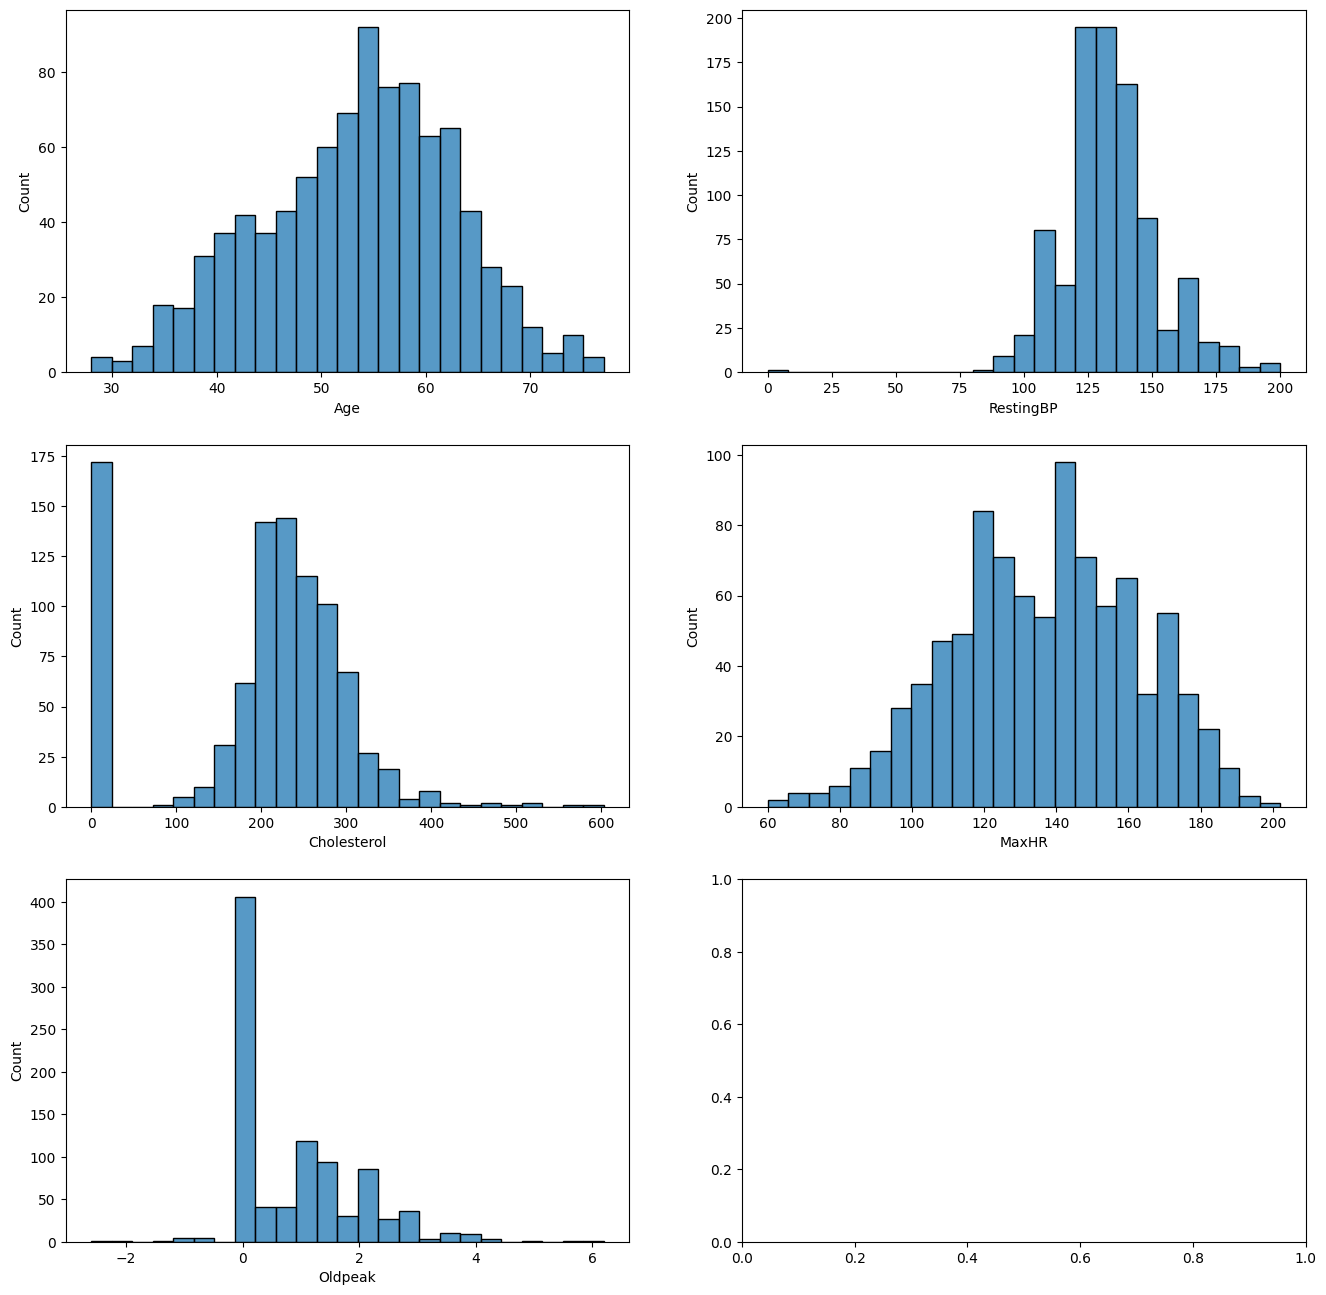

In [9]:
# Histgram for numercial features
fig, ax = plt.subplots(3, 2, figsize=(16,16))

for i in range(0, (len(ax.flatten())-1)):
#     print('{}, {}'.format(int(i/2),i % 2))
    sns.histplot(data=df_heart, x =df_heart[numerical[i]], bins=25, ax=ax[int(i/2),i % 2])

<div style=" background-color:#0A1172;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Observation: From the histograms, some values of rest BP, cholesterol and old peak are abnormal. We will replace the abnormal values with median of the data features. Also, from the boxplot, there are outliers for some featurs.  In the next step, we are going to remove the outliers.
</div>

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
    To remove outliers by <b>IRQ method</b> - IQR method is used to identify outliers to set up a boundary outside of Q1 and Q3. Any values that fall outside of the boundary are considered outliers. </div>

In [10]:
for col in numerical:
    if col != 'FastingBS': # Skip this variable since it is skewed
        p75 = df_heart[df_heart[col] > 0][col].quantile(0.75)
        p25 = df_heart[df_heart[col] > 0][col].quantile(0.25)
        iqr = p75 - p25
        upper_limit = p75 + (1.5 * iqr)
        print('===={} with Upper Limit {:6.1f}, P75 {:6.1f}, P25 {:6.1f}, {} Outlier Records ========'.format(col, upper_limit, p75, p25, df_heart[df_heart[col] > upper_limit]['HeartDisease'].count()))
        df_heart[col] = np.where (df_heart[col] > upper_limit, upper_limit, df_heart[col])

====Age with Upper Limit   79.5, P75   60.0, P25   47.0, 0 Outlier Records ========
====RestingBP with Upper Limit  170.0, P75  140.0, P25  120.0, 26 Outlier Records ========
====Cholesterol with Upper Limit  376.6, P75  275.0, P25  207.2, 20 Outlier Records ========
====MaxHR with Upper Limit  210.0, P75  156.0, P25  120.0, 0 Outlier Records ========
====Oldpeak with Upper Limit    3.5, P75    2.0, P25    1.0, 20 Outlier Records ========


<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To replace abnormal Cholesterol and Oldpeak with Median of the features </div>

In [11]:
# For Cholesterol and Resting BP, we replace abnormal values with the median.
median_Cholesterol = df_heart['Cholesterol'].median()
median_RestingBP = df_heart['RestingBP'].median()

# For Old Peak, we replace abnormal values with the 0.
# median_Oldpeak = df_heart['Oldpeak'].median()

df_heart['Cholesterol'] = np.where(df_heart['Cholesterol'] <= 70, median_Cholesterol, df_heart['Cholesterol'])
df_heart['RestingBP'] = np.where(df_heart['RestingBP'] <= 50, median_RestingBP, df_heart['RestingBP'])
df_heart['Oldpeak'] = np.where(df_heart['Oldpeak'] < 0, 0, df_heart['Oldpeak'])

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To update the Histogram to check for abnormal and outlier</div>

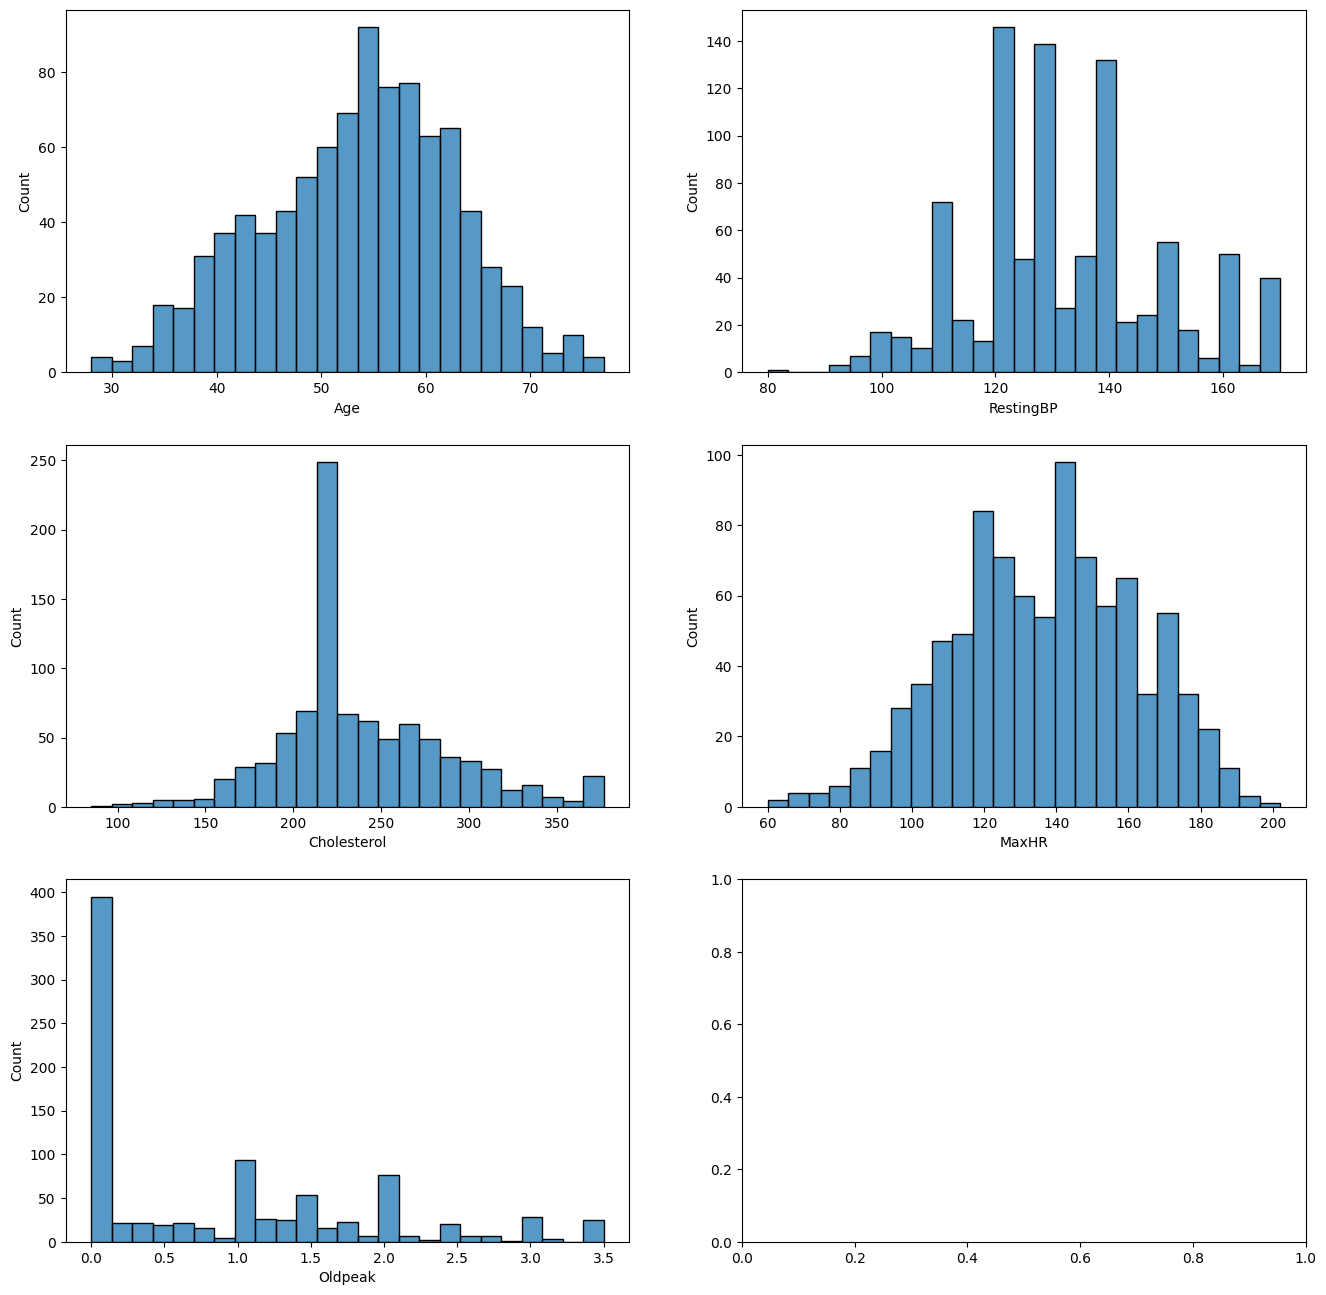

In [12]:
# Updated histogram after the outlier replacement
# Histgram for numercial features
fig, ax = plt.subplots(3, 2, figsize=(16,16))

for i in range(0, 5):
    sns.histplot(data=df_heart, x =df_heart[numerical[i]], bins=25, ax=ax[int(i/2),i % 2])

<div style=" background-color:#0A1172;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Observation: the IRQ is used to remove outliers.  In addition, from the histograms, some values of rest BP, cholesterol and old peak are abnormal. We will replace the abnormal values.
<br><br>
After the replacement of missing values and handling of abnormal values, the histogram looks more rational. </div>

# 4. Data Standardization and Encoding
<div style=" background-color:#3a5311;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Objective: Data standardization is to pull all numerical variables into the same scale so that the discriminative power of features with high ranged value cannot dominate to the importance of target  due to high absolute value of features.  Data encoding is a process to convert categorical features into numerical values so that the distance between values in categorical features can be measured.
</div>

## 4.1 Numerical Features

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To standardize the numerical variables with the use of Robust Scaler.  The choice of Robust Scaler over Standard Scaler is  the capability to handle outliers. </div>


In [13]:
scaler = RobustScaler()
encoder_num = scaler.fit_transform(df_heart[numerical])
encoded_num = pd.DataFrame(encoder_num, columns =numerical)
encoded_num.shape
print(encoded_num.head(10))

        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0 -1.076923        0.5     1.245283  0.944444 -0.400000
1 -0.384615        1.5    -0.811321  0.500000  0.266667
2 -1.307692        0.0     1.132075 -1.111111 -0.400000
3 -0.461538        0.4    -0.169811 -0.833333  0.600000
4  0.000000        1.0    -0.528302 -0.444444 -0.400000
5 -1.153846       -0.5     2.188679  0.888889 -0.400000
6 -0.692308        0.0     0.264151  0.888889 -0.400000
7  0.000000       -1.0    -0.283019  0.111111 -0.400000
8 -1.307692        0.5    -0.301887 -0.222222  0.600000
9 -0.461538       -0.5     1.150943 -0.500000 -0.400000


## 4.2 Categorical Features

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To visualize the distribution of feature values by categorical features </div>


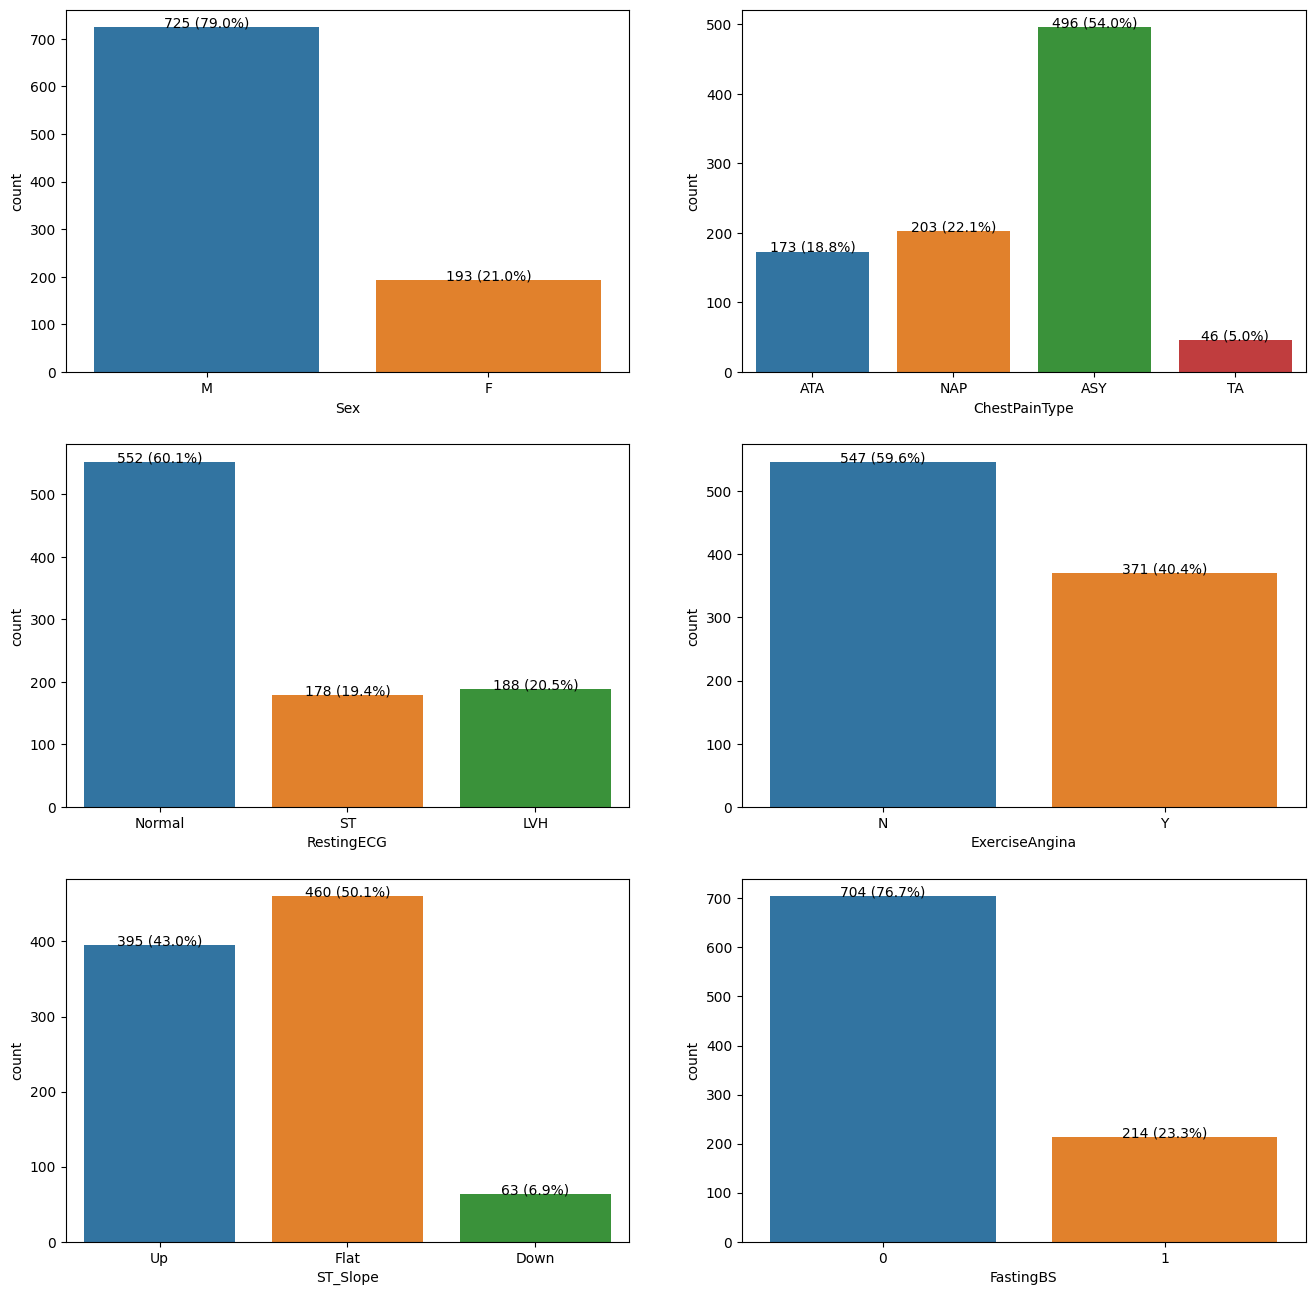

In [14]:
fig, ax = plt.subplots (3, 2, figsize=(16, 16))
ax_rst = []

for i in range(len(categorical)):
    axs = sns.countplot(data=df_heart, x =df_heart[categorical[i]], ax=ax[int(i/2),i % 2])
    ax_rst.append(axs)
    total = df_heart[categorical[i]].value_counts().sum()
    for p in axs.patches:
        value_pct = '{:.0f} ({:.1f}%)'.format(p.get_height(), 100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        axs.annotate(value_pct, (x, y),ha='center')


<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
One-hot Encoding is used to convert categorical features into binary vectors.  Each unique category in the original data has been transformed into a binary vector, where each element of the vector represents whether or not that category is present in the original data for that particular row.
 </div>


In [15]:
# Call the One-hot Encoder
encoder = OneHotEncoder()

# print(categorical)

#for col in categorical:
encoder_cat = encoder.fit_transform(df_heart[categorical])
# encoded_cat = pd.DataFrame(encoder_cat.toarray(), columns=['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
#        'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
#        'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS_0', 'FastingBS_1'])
encoded_cat = pd.DataFrame(encoder_cat.toarray(), columns=encoder.get_feature_names_out().tolist())


print(encoded_cat.head(5))

# encoded_cat.columns = encoded_cat.columns.str.replace('[#,@,&]()', '')

   Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0    0.0    1.0                0.0                1.0                0.0   
1    1.0    0.0                0.0                0.0                1.0   
2    0.0    1.0                0.0                1.0                0.0   
3    1.0    0.0                1.0                0.0                0.0   
4    0.0    1.0                0.0                0.0                1.0   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0               0.0             0.0                1.0            0.0   
1               0.0             0.0                1.0            0.0   
2               0.0             0.0                0.0            1.0   
3               0.0             0.0                1.0            0.0   
4               0.0             0.0                1.0            0.0   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0               1.0              

<div style=" background-color:#0A1172;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Observation: With data encoding, the categorical features are converted into binary vectors which can be used as inputs to most modeling algorithms. </div>

# 5. Model preparation

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The first step is to set up the training data set.  Next, the training data set is split into training and testing data sets for modelling.  Different modelling algorithms are used for performance comparison.  </div>

In [16]:
# Prepare the training data set
df_train = df_heart.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


## 5.1 Preparation of Modelling data set

<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
This step is to set up the data set for modelling based on the standardized and encoded features in the previous steps.  </div>

In [17]:
df_train.drop(numerical, axis=1, inplace=True)
df_train.drop(categorical, axis=1, inplace=True)
df_train = pd.concat([df_train, encoded_num, encoded_cat], axis=1)
df_train.head(10)

,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1
0,0,-1.076923,0.5,1.245283,0.944444,-0.400000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,-0.384615,1.5,-0.811321,0.500000,0.266667,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,-1.307692,0.0,1.132075,-1.111111,-0.400000,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,-0.461538,0.4,-0.169811,-0.833333,0.600000,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,0.000000,1.0,-0.528302,-0.444444,-0.400000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0,-1.153846,-0.5,2.188679,0.888889,-0.400000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0,-0.692308,0.0,0.264151,0.888889,-0.400000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0,0.000000,-1.0,-0.283019,0.111111,-0.400000,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,1,-1.307692,0.5,-0.301887,-0.222222,0.600000,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0,-0.461538,-0.5,1.150943,-0.500000,-0.400000,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To prepare the training and testing data sets.   </div>

In [18]:
# The first column is the target label
y = df_train.iloc[:,0:1]

# The rest of columns are features
X = df_train.iloc[:,1:]

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
print('size of X_train {} and y_train {}'.format (X_train.shape, y_train.shape))
print('size of X_test {} and y_test {}'.format (X_test.shape, y_test.shape))

size of X_train (642, 21) and y_train (642, 1)
size of X_test (276, 21) and y_test (276, 1)


In [20]:
X_train.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1
736,0.000000,-0.40,1.188679,-0.611111,1.733333,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
297,0.230769,-1.00,0.000000,-0.194444,0.533333,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
424,0.461538,-0.50,0.000000,0.083333,0.933333,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
247,-0.461538,-0.40,0.981132,0.333333,0.933333,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
415,0.923077,1.25,0.000000,-1.333333,-0.400000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
511,0.692308,1.50,0.830189,-1.388889,0.933333,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
857,-0.076923,0.00,0.773585,0.138889,-0.133333,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
422,0.846154,1.00,0.245283,-0.916667,-0.400000,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
594,0.307692,1.50,0.622642,-0.694444,0.266667,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
904,0.153846,-0.50,0.320755,0.861111,-0.400000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



<div style=" background-color:#d0312d;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
This function is used to log model performance for comparison. </div>

In [21]:
# Dataframe for performance comparison
df_performance = pd.DataFrame(columns=['Model', 'Balanced Accuracy', 'Accuracy', 'Precision', 'F1', 'Recall', 'ROC AUC'])
df_performance

,Model,Balanced Accuracy,Accuracy,Precision,F1,Recall,ROC AUC


In [22]:
def model_performance (p_test, p_train, p_test_prob, p_train_prob, Y_test, y_train, model_name):
    global df_performance
    predicted_test = pd.DataFrame(p_test)
    predicted_train = pd.DataFrame(p_train)
    print('=============================================')
    print('Scoring Metrics for {} (Validation)'.format(model_name))
    print('=============================================')
    print('Balanced Accuracy Score = {:2.3f}'.format(metrics.balanced_accuracy_score(Y_test, predicted_test)))
    print('Accuracy Score = {:2.3f}'.format(metrics.accuracy_score(Y_test, predicted_test)))
    print('Precision Score = {:2.3f}'.format(metrics.precision_score(Y_test, predicted_test)))
    print('F1 Score = {:2.3f}'.format(metrics.f1_score(Y_test, predicted_test, labels=['0','1'])))
    print('Recall Score = {:2.3f}'.format(metrics.recall_score(Y_test, predicted_test, labels=['0','1'])))
    print('ROC AUC Score = {:2.3f}'.format(metrics.roc_auc_score(Y_test, predicted_test, labels=['0','1'])))
    print('Confusion Matrix')
    print('==================')
    print(metrics.confusion_matrix(Y_test, predicted_test))
    print('==================')
    print(metrics.classification_report(Y_test, predicted_test, target_names=['0','1']))
    metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test, predicted_test)).plot()

    df_performance = df_performance.append({'Model':model_name
                                            , 'Balanced Accuracy': metrics.balanced_accuracy_score(Y_test, predicted_test)
                                            , 'Accuracy' :metrics.accuracy_score(Y_test, predicted_test)
                                            , 'Precision' :metrics.precision_score(Y_test, predicted_test)
                                            , 'F1':metrics.f1_score(Y_test, predicted_test, labels=['0','1'])
                                            , 'Recall': metrics.recall_score(Y_test, predicted_test, labels=['0','1'])
                                            , 'ROC AUC': metrics.roc_auc_score(Y_test, predicted_test, labels=['0','1'])
                                           }, ignore_index = True)

    # ROC Curve
    fpr_test, tpr_test, _ = metrics.roc_curve(Y_test, p_test_prob)

    roc_auc_test = metrics.roc_auc_score(Y_test, predicted_test, labels=['0','1'])

    # Precision x Recall Curve
    precision_test, recall_test, thresholds_test = metrics.precision_recall_curve(Y_test, p_test_prob)

    print('=============================================')
    print('Scoring Metrics for {} (Training)'.format(model_name))
    print('=============================================')
    print('Balanced Accuracy Score = {:2.3f}'.format(metrics.balanced_accuracy_score(y_train, predicted_train)))
    print('Accuracy Score = {:2.3f}'.format(metrics.accuracy_score(y_train, predicted_train)))
    print('Precision Score = {:2.3f}'.format(metrics.precision_score(y_train, predicted_train)))
    print('F1 Score = {:2.3f}'.format(metrics.f1_score(y_train, predicted_train)))
    print('Recall Score = {:2.3f}'.format(metrics.recall_score(y_train, predicted_train, labels=['0','1'])))
    print('ROC AUC Score = {:2.3f}'.format(metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])))
    print('Confusion Matrix')
    print('==================')
    print(metrics.confusion_matrix(y_train, predicted_train))
    print('==================')
    print(metrics.classification_report(y_train, predicted_train, target_names=['0','1']))
    metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, predicted_train)).plot()

    fpr_train, tpr_train, _ = metrics.roc_curve(y_train, p_train_prob)

    roc_auc_train = metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])


    print('======= ROC Curve =======')
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    plt.plot(fpr_test, tpr_test, color='darkorange', label='ROC curve - Validation (area = %0.3f)' % roc_auc_test)
    plt.plot(fpr_train, tpr_train, color='darkblue', label='ROC curve - Training (area = %0.3f)' % roc_auc_train)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")


    plt.show()

# 6. AutoML - AutoSKLearn

## 6.1 Install the AutoSKLearn Packages

## 6.2 Model Training
* You should change the time_left_for_this_task to 1800. Due to the time limitation, we will stay with 60s during the lesson.

In [23]:
import autosklearn.classification

SK_automl = autosklearn.classification.AutoSklearnClassifier(
#    time_left_for_this_task=1800,
    time_left_for_this_task=60,
    per_run_time_limit=40,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5}
)
SK_automl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


[WARNING] [2023-07-03 02:03:53,235:Client-AutoML(1):db333f2f-1945-11ee-b157-0242ac1c000c] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=40, resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=60)

In [24]:
# print(np.argmax(SK_automl.cv_results_['mean_test_score']))
# print(SK_automl.cv_results_['params'])

## 6.3. Model Performance

In [25]:
p_train_AutoSKLearn = SK_automl.predict(X_train)
p_test_AutoSKLearn = SK_automl.predict(X_test)
p_train_proba_AutoSKLearn = SK_automl.predict_proba(X_train)[:,1]
p_test_proba_AutoSKLearn = SK_automl.predict_proba(X_test)[:,1]

Scoring Metrics for AutoSKLearn (Validation)
Balanced Accuracy Score = 0.882
Accuracy Score = 0.884
Precision Score = 0.859
F1 Score = 0.893
Recall Score = 0.931
ROC AUC Score = 0.882
Confusion Matrix
[[110  22]
 [ 10 134]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       132
           1       0.86      0.93      0.89       144

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276



<ipython-input-22-f9073eb0887e>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_performance = df_performance.append({'Model':model_name


Scoring Metrics for AutoSKLearn (Training)
Balanced Accuracy Score = 1.000
Accuracy Score = 1.000
Precision Score = 1.000
F1 Score = 1.000
Recall Score = 1.000
ROC AUC Score = 1.000
Confusion Matrix
[[278   0]
 [  0 364]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       1.00      1.00      1.00       364

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642

======= ROC Curve =======


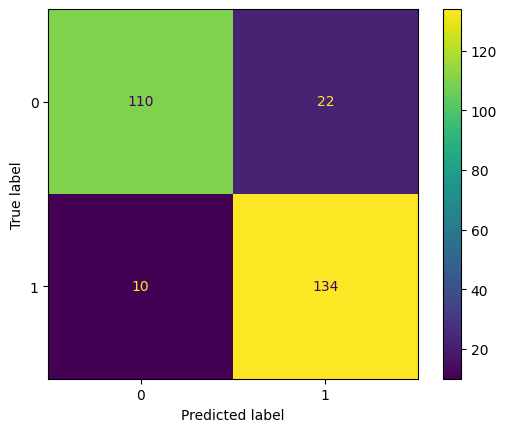

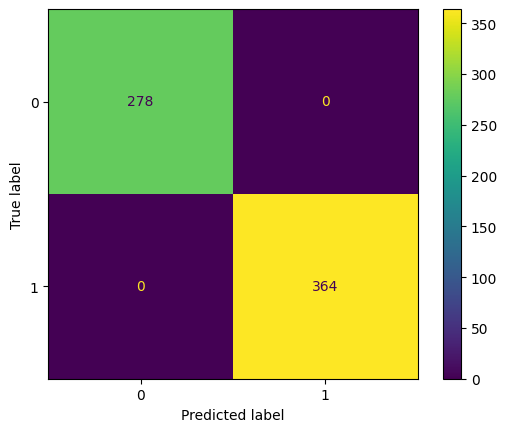

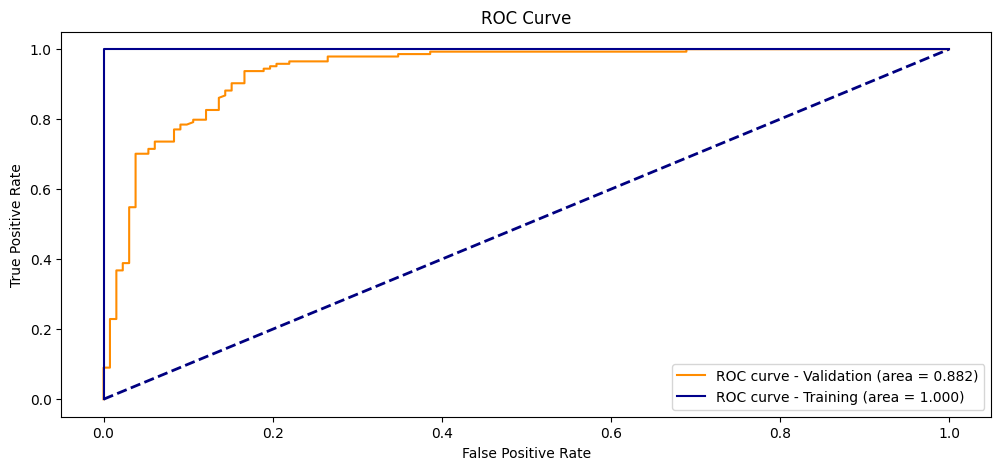

In [26]:
model_performance(p_test_AutoSKLearn, p_train_AutoSKLearn, p_test_proba_AutoSKLearn, p_train_proba_AutoSKLearn, y_test, y_train, 'AutoSKLearn')

# 7. AutoML - Autogluon

## 7.1 Install the Autogluon Packages

In [27]:
# Run this if autogluon is not already installed
# !pip install "mxnet<2.0.0"
# !pip install autogluon

#!pip install autogluon
import os,warnings,sys
import numpy as np
import torch as tc
from tqdm import tqdm
import pandas as pd
warnings.filterwarnings("ignore")
from autogluon.tabular import TabularDataset, TabularPredictor
import matplotlib.pyplot as plt


## 7.2 Model Training

In [28]:
# Training models
X_autogluon = pd.concat([X_train, y_train], axis=1)
X_autogluon.head(10)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_0,FastingBS_1,HeartDisease
736,0.000000,-0.40,1.188679,-0.611111,1.733333,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
297,0.230769,-1.00,0.000000,-0.194444,0.533333,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
424,0.461538,-0.50,0.000000,0.083333,0.933333,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
247,-0.461538,-0.40,0.981132,0.333333,0.933333,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
415,0.923077,1.25,0.000000,-1.333333,-0.400000,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
511,0.692308,1.50,0.830189,-1.388889,0.933333,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
857,-0.076923,0.00,0.773585,0.138889,-0.133333,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
422,0.846154,1.00,0.245283,-0.916667,-0.400000,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1
594,0.307692,1.50,0.622642,-0.694444,0.266667,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
904,0.153846,-0.50,0.320755,0.861111,-0.400000,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [29]:
from autogluon.tabular import TabularDataset, TabularPredictor

Gluon_automl = TabularPredictor(label='HeartDisease', eval_metric='roc_auc').fit(X_autogluon, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20230703_020457/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230703_020457/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Disk Space Avail:   83.14 GB / 115.66 GB (71.9%)
Train Data Rows:    642
Train Data Columns: 21
Label Column: HeartDisease
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 

## 7.3. Model Performance

In [30]:
p_train_AutoGluon = Gluon_automl.predict(X_train)
p_test_AutoGluon = Gluon_automl.predict(X_test)
p_train_proba_AutoGluon = Gluon_automl.predict_proba(X_train).iloc[:,1]
p_test_proba_AutoGluon = Gluon_automl.predict_proba(X_test).iloc[:,1]


Scoring Metrics for AutoGluon (Validation)
Balanced Accuracy Score = 0.871
Accuracy Score = 0.873
Precision Score = 0.852
F1 Score = 0.883
Recall Score = 0.917
ROC AUC Score = 0.871
Confusion Matrix
[[109  23]
 [ 12 132]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       132
           1       0.85      0.92      0.88       144

    accuracy                           0.87       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276

Scoring Metrics for AutoGluon (Training)
Balanced Accuracy Score = 0.945
Accuracy Score = 0.949
Precision Score = 0.941
F1 Score = 0.955
Recall Score = 0.970
ROC AUC Score = 0.945
Confusion Matrix
[[256  22]
 [ 11 353]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       278
           1       0.94      0.97      0.96       364

    accuracy                           0.95       642
   macro avg 

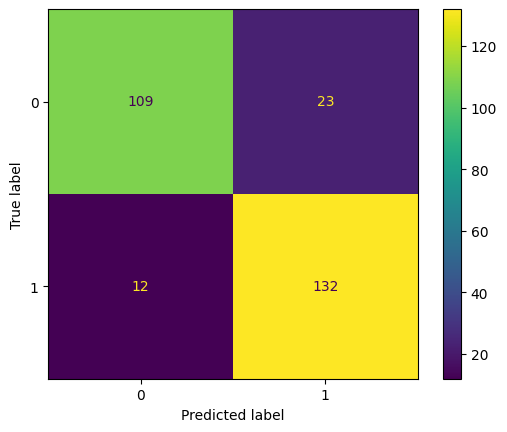

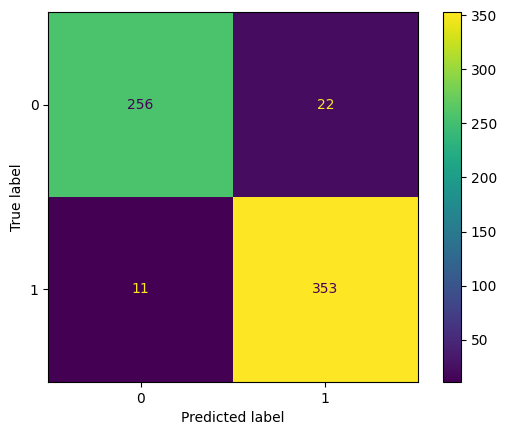

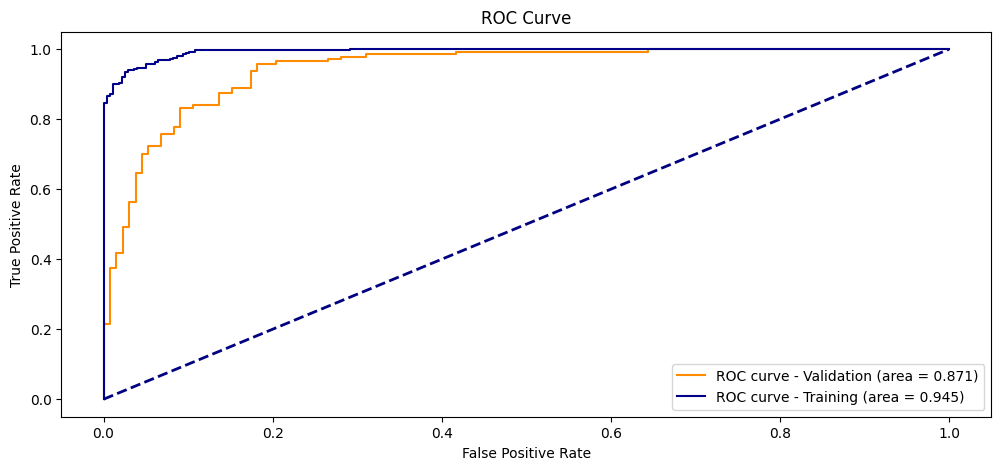

In [31]:
model_performance(p_test_AutoGluon, p_train_AutoGluon, p_test_proba_AutoGluon, p_train_proba_AutoGluon, y_test, y_train, 'AutoGluon')

# 8. AutoML - FLAML

## 8.1 Install the FLAML Packages

In [32]:
# Install  the FLAML package
#!pip install flaml
from flaml import AutoML

## 8.2. Model Training

In [33]:
# Initialize an AutoML instance
FL_automl = AutoML()

# Specify automl goal and constraint
FL_automl_settings = {
    # in seconds
#    "time_budget": 120,
    "time_budget": 60,
    "metric": 'accuracy',
    "task": 'classification',
    "verbose": 0,
    "n_jobs": -1,
    "eval_method": 'cv',
    "n_splits":5
}

# Train with labeled input data
#FL_automl.fit(X_train, y_train, task="regression", time_budget=60, **other_settings)

FL_automl.fit(X_train, y_train.to_numpy(), **FL_automl_settings)


In [34]:
print('Best ML leaner:', FL_automl.best_estimator)
print('Best hyperparmeter config:', FL_automl.best_config)
print('Training duration of best run: {0:.4g} s', FL_automl.best_config_train_time)

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 23, 'num_leaves': 4, 'min_child_samples': 5, 'learning_rate': 0.4767056697206916, 'log_max_bin': 6, 'colsample_bytree': 0.6796374019597641, 'reg_alpha': 0.0017271108100233477, 'reg_lambda': 0.004941512554626145}
Training duration of best run: {0:.4g} s 0.015189647674560547


## 8.3. Model Performance

In [35]:
p_train_FLAML = FL_automl.predict(X_train)
p_test_FLAML = FL_automl.predict(X_test)
p_train_proba_FLAML = FL_automl.predict_proba(X_train)[:,1]
p_test_proba_FLAML = FL_automl.predict_proba(X_test)[:,1]

Scoring Metrics for FLAML (Validation)
Balanced Accuracy Score = 0.861
Accuracy Score = 0.862
Precision Score = 0.849
F1 Score = 0.872
Recall Score = 0.896
ROC AUC Score = 0.861
Confusion Matrix
[[109  23]
 [ 15 129]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       132
           1       0.85      0.90      0.87       144

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Scoring Metrics for FLAML (Training)
Balanced Accuracy Score = 0.910
Accuracy Score = 0.913
Precision Score = 0.918
F1 Score = 0.923
Recall Score = 0.929
ROC AUC Score = 0.910
Confusion Matrix
[[248  30]
 [ 26 338]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       278
           1       0.92      0.93      0.92       364

    accuracy                           0.91       642
   macro avg       0.

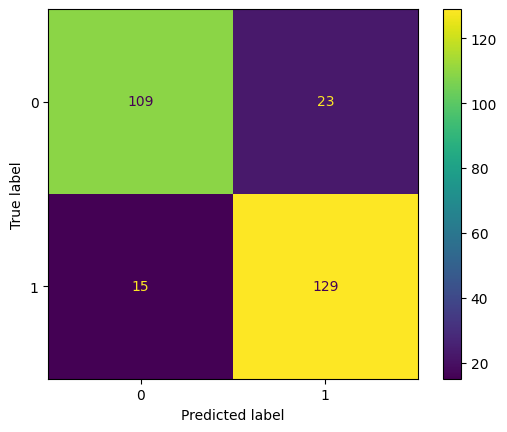

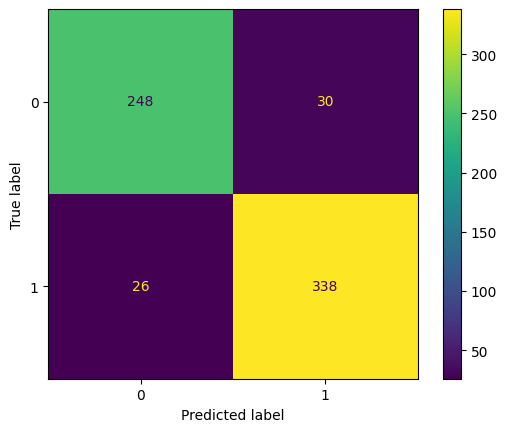

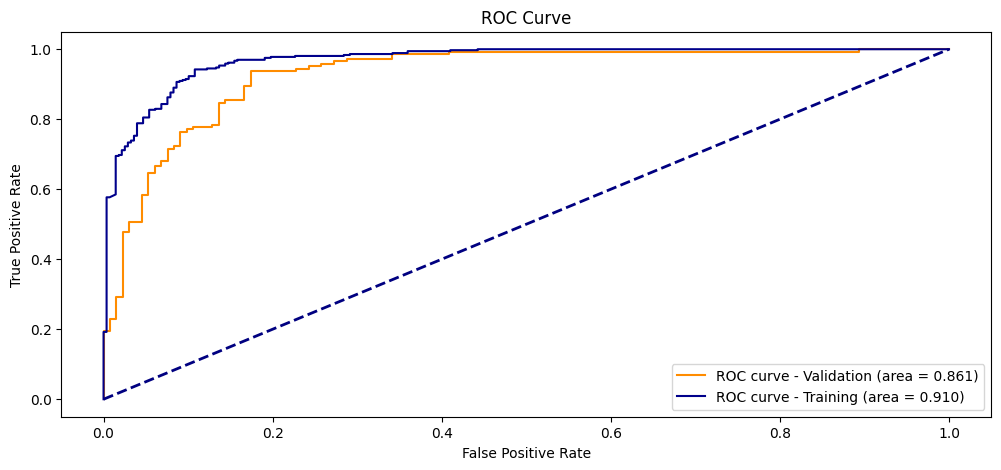

In [36]:
model_performance(p_test_FLAML, p_train_FLAML, p_test_proba_FLAML, p_train_proba_FLAML, y_test, y_train, 'FLAML')

# 9. Model Performance Comparison and Observation

## 9.1. Performance Comparison for AutoML Packgaes


In [37]:
df_performance = df_performance.round(2)
df_performance

,Model,Balanced Accuracy,Accuracy,Precision,F1,Recall,ROC AUC
0,AutoSKLearn,0.88,0.88,0.86,0.89,0.93,0.88
1,AutoGluon,0.87,0.87,0.85,0.88,0.92,0.87
2,FLAML,0.86,0.86,0.85,0.87,0.90,0.86


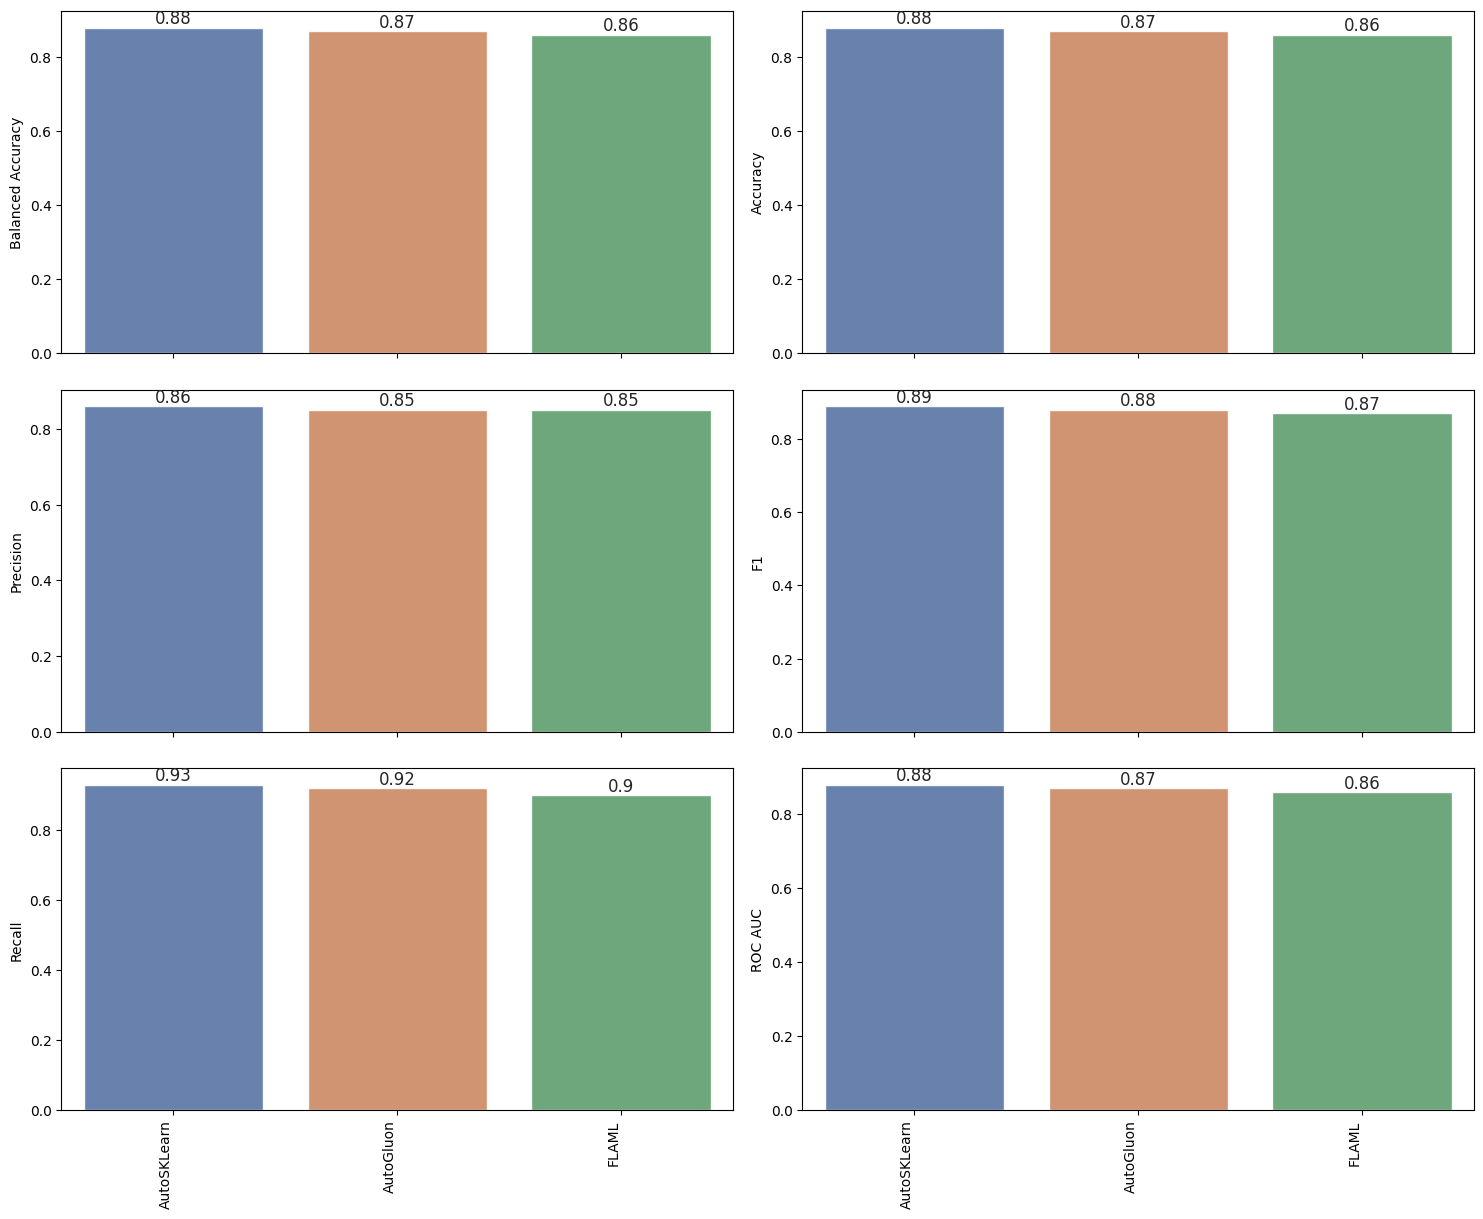

In [38]:
cols_review = df_performance['Model'].values.tolist()

fig, axs = plt.subplots(3, 2, figsize=(15,14), squeeze=False)

sns.set(style="darkgrid")
ax = sns.barplot(x = cols_review, y = df_performance['Balanced Accuracy'], alpha=0.9,ax = axs[0][0])
ax.bar_label(ax.containers[0])
ax = sns.barplot(x = cols_review, y = df_performance['Accuracy'], alpha=0.9,ax = axs[0][1])
ax.bar_label(ax.containers[0])
ax = sns.barplot(x = cols_review, y = df_performance['Precision'], alpha=0.9,ax = axs[1][0])
ax.bar_label(ax.containers[0])
ax = sns.barplot(x = cols_review, y = df_performance['F1'], alpha=0.9,ax = axs[1][1])
ax.bar_label(ax.containers[0])
ax = sns.barplot(x = cols_review, y = df_performance['Recall'], alpha=0.9,ax = axs[2][0])
ax.bar_label(ax.containers[0])
ax = sns.barplot(x = cols_review, y = df_performance['ROC AUC'], alpha=0.9,ax = axs[2][1])
ax.bar_label(ax.containers[0])

plt.tight_layout()
fig.autofmt_xdate(rotation=90)


plt.show()

## 9.2. Observation

<div style="text-align:left; padding: 13px 13px; border-radius: 8px; font-size: 16px">
The results indicate that <b>Autogluon</b> outperforms the other two packages, while <b>AutoSKLearn</b> performs the worst. One of the reasons for this difference in performance could be the availability of model algorithms. <b>AutoSKLearn</b> only uses models available in SKLearn and forms ensembles from base learners such as regression, decision tree, and kNN. In contrast, <b>FLAML</b> and <b>Autogluon</b> AutoML include advanced model algorithms like XGBoost, LGBM, and CatBoost. Despite the advanced model algorithms, <b>Autogluon</b> AutoML also uses an ensemble classifier based on the base advanced model learners of XGBoost and LGBM. This drives <b>Autogluon</b> to slightly outperform <b>FLAML</b>, as <b>FLAML</b> has no ensemble classifier from the base learners.


 </div>